In [7]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

In [4]:
class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status

In [5]:
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)

In [6]:
#The filter Twitter Streams to capture data by the keywords:
stream.filter(track=['modi', 'kejriwal'])       

401
401


KeyboardInterrupt: 

In [9]:
ls

article_extract.ipynb  links.txt                styles/
eda_imdb.ipynb         python_tut.ipynb*        twitter.ipynb
get_tweets.py*         read_tweets.py           twitter_modi_kejriwal.txt*
imdb_top_250.csv       scraping_tutorial.ipynb  Untitled1.ipynb


In [13]:
tweets_data_path = 'twitter_modi_kejriwal.txt'

In [10]:
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [12]:
len(tweets_data)

2236

In [15]:
tweets_data[0]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Sat Jun 20 20:08:45 +0000 2015',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'trends': [],
  u'urls': [],
  u'user_mentions': [{u'id': 21186231,
    u'id_str': u'21186231',
    u'indices': [3, 16],
    u'name': u'\u0939\u092e \u092d\u093e\u0930\u0924 \u0915\u0947 \u0932\u094b\u0917',
    u'screen_name': u'India_Policy'}]},
 u'favorite_count': 0,
 u'favorited': False,
 u'filter_level': u'low',
 u'geo': None,
 u'id': 612351400454938624,
 u'id_str': u'612351400454938624',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'lang': u'en',
 u'place': None,
 u'possibly_sensitive': False,
 u'retweet_count': 0,
 u'retweeted': False,
 u'retweeted_status': {u'contributors': None,
  u'coordinates': None,
  u'created_at': u'Sat Jun 20 06:57:10 +0000 2015',
  u'entities': {u'hashtags': [],
   u'symbols': []

In [16]:
tweets_data[0].keys()

[u'contributors',
 u'truncated',
 u'text',
 u'in_reply_to_status_id',
 u'id',
 u'favorite_count',
 u'source',
 u'retweeted',
 u'coordinates',
 u'timestamp_ms',
 u'entities',
 u'in_reply_to_screen_name',
 u'id_str',
 u'retweet_count',
 u'in_reply_to_user_id',
 u'favorited',
 u'retweeted_status',
 u'user',
 u'geo',
 u'in_reply_to_user_id_str',
 u'possibly_sensitive',
 u'lang',
 u'created_at',
 u'filter_level',
 u'in_reply_to_status_id_str',
 u'place']

In [23]:
tweets_data[1]['user']['name']

u'Claudio Pace'

In [18]:
tweets_data[1]['place']

{u'attributes': {},
 u'bounding_box': {u'coordinates': [[[6.6266397, 35.4928765],
    [6.6266397, 47.0924248],
    [18.5203619, 47.0924248],
    [18.5203619, 35.4928765]]],
  u'type': u'Polygon'},
 u'country': u'Italia',
 u'country_code': u'IT',
 u'full_name': u'Italia',
 u'id': u'c799e2d3a79f810e',
 u'name': u'Italia',
 u'place_type': u'country',
 u'url': u'https://api.twitter.com/1.1/geo/id/c799e2d3a79f810e.json'}

In [24]:
tweets = pd.DataFrame()

In [25]:
tweets['user'] = map(lambda tweet: tweet['user']['name'], tweets_data)
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

In [26]:
tweets.head(5)

,user,text,lang,country
0,vijay,"RT @India_Policy: Sheila was corrupt, Kejriwal...",en,None
1,Claudio Pace,#FamilyDay http://t.co/xZ1t3gTzXQ @a_meluzzi @...,sv,Italia
2,FTSN Mainstream News,Is Lalit Modi close to getting UK citizenship?...,en,None
3,narada muni,RT @anilkapur_: Italian @INCIndia may make it ...,en,None
4,NIRANJAN BISWAL,A heartily thanks to prime minister of India N...,en,None


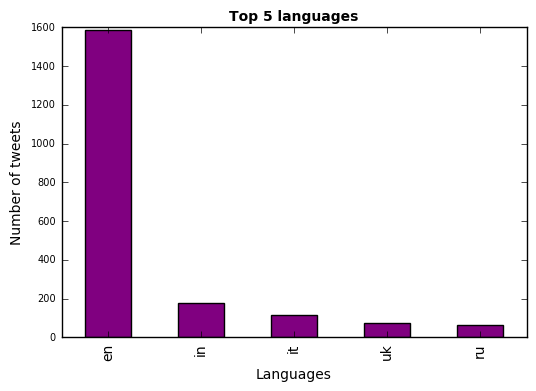

In [31]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=7)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='purple')
plt.show()